# Trabajo Practico Matematica III - Ciencia de datos #

Nombre y Apellido -> Lucas Antenni  
Fecha de Entrega -> 11.11.2022

La idea de este trabajo practico es el analisis de datos del siguiente archivo con formato .csv  -> **`corredores.csv`**.  

El nombre original del archivo era **`categorías de corredores.csv`** pero fue cambiado para acomodarse con la tarea en cuestion. 

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Analisis de datos ##

Antes de iniciar con todo el analisis, es necesario importar todos los modulos necesarios para el trabajo.  
*tambien se desactivaron los warnings*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython import display
##------------- Modulos de sklearn --------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
##------------- Modulos Personalizados --------------------------
from module import dataFrameFunctions as dff
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

Procedemos a incorporar en el proyecto un *dataFrame* de los corredores y visualizamos los primeros 5 elementos, solamente para ver como se ve el *dataFrame*

In [2]:
dfCorredores = pd.read_csv('corredores.csv')
dfCorredores.head()

,Unnamed: 0,place,gender,age,home,time,Velocidad
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular


Vemos que hay una columna sin nombre. Para solucionar esto cambiaremos el nombre y haremos algunas modificaciones para mejorar la prolijidad y presentación.

In [3]:
dfCorredores.rename(columns={
    'Unnamed: 0':'ID',
    'place':'Place',
    'gender':'Gender',
    'age':'Age',
    'home':'Home',
    'time':'Time',
    'Velocidad':'Velocity'},
    inplace=True)

Una vez hecho esto, lo que haremos es hacer un display de los primeros y ultimos 15 corredores, para poder tener una vision general de los datos.

In [4]:
dfCorredores.head(n=15)

,ID,Place,Gender,Age,Home,Time,Velocity
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
5,1720,1784,Male,40,NJ,201.966667,Regular
6,15736,16020,Female,30,CA,283.566667,Regular
7,10580,10805,Male,27,GBR,255.883333,Regular
8,11957,12201,Male,42,NED,264.250000,Regular
9,18933,19266,Male,48,B.C,306.683333,Lento


In [5]:
dfCorredores.tail(n=15)

,ID,Place,Gender,Age,Home,Time,Velocity
985,20530,20877,Male,29,SUI,324.666667,Lento
986,13981,14245,Male,40,MA,273.700000,Regular
987,13190,13446,Female,37,IN,267.633333,Regular
988,1038,1079,Male,40,NED,191.316667,Veloz
989,13752,14013,Male,49,ITA,273.033333,Regular
990,23273,23645,Female,46,NY,501.550000,Lento
991,15901,16189,Female,51,TN,285.350000,Regular
992,14889,15162,Female,50,GER,278.116667,Regular
993,11547,11784,Female,40,NY,263.383333,Regular
994,4079,4206,Male,27,CAN,223.333333,Regular


## Analisis de las columnas

- ID - id del corredor
- Place - posicion del corredor
- Gender - genero del corredor
- Age - edad del corredor
- Home - pais del corredor
- Time - tiempo total en completar la carrera
- Velocity - velocidad en la que fueron

Una cosa que se ve es que la velocidad del corredor es dependiente del tiempo que tardo en completar la carrera.  

- Si el corredor tuvo un **tiempo mayor o igual a 300**, es considerado **Lento**  
- Si el corredor tuvo un **tiempo mayor o igual a 200**, es considerado **Regular**  
- Si el corredor tuvo un **tiempo menor a 200**, es considerado **Veloz**

## Limpieza de datos ##

Vamos a eliminar los datos que cumplan el rol de numerar o de indicar un orden, este sería el ID. El nuevo dataFragment que vamos a usar se llamará **dfScrappedCorredores**

In [6]:
dfScrappedCorredores = dfCorredores.copy()
dfScrappedCorredores.pop('ID')
dfScrappedCorredores

,Place,Gender,Age,Home,Time,Velocity
0,3592,Male,52,GBR,217.483333,Regular
1,13853,Female,40,NY,272.550000,Regular
2,12256,Male,31,FRA,265.283333,Regular
3,10457,Female,33,MI,256.150000,Regular
4,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...
995,16261,Male,61,FRA,285.883333,Regular
996,1131,Male,37,GBR,191.916667,Veloz
997,16713,Female,53,IRL,289.016667,Regular
998,14241,Female,21,NY,276.050000,Regular


### Describe() ###

Vemos unos datos generales que nos puede aportar pandas con el `describe()`.

In [7]:
dfScrappedCorredores.describe()

,Place,Age,Time
count,1000.000000,1000.000000,1000.000000
mean,11992.319000,39.100000,268.570700
std,6858.858466,10.675391,53.550743
min,54.000000,5.000000,147.333333
25%,6095.000000,31.000000,233.775000
50%,11962.000000,38.000000,262.841667
75%,17921.750000,46.000000,294.854167
max,23662.000000,81.000000,566.783333


Podemos observar Algunos datos relevantes, existe un promedio al respecto de la **edad**, la **posicion** y el **tiempo** de cada partipante.  
Respecto a la **edad** vemos el **promedio**, que es **39 años**.  
Sobre el tiempo, podemos observar que el **tiempo promedio** de los corredores fue de **268**.  
Podemos observar los primeros acercamientos del corredor mas rapido, estando en **la posición más chica** y teniendo **el menor tiempo**, siendo estos respecticamente el **puesto 54** con el **tiempo 147.33**.  
Tambien podemos ver la edad del corredor mas joven, de todas formas vemos que este no necesariamente es del mas rapido, sino que tomo el valor mas chico de la columna Age. La edad de corredor mas chico es de **5 años**

### Shape ###
`shape` solamente nos indica el tamaño de la tabla. 

In [8]:
dfScrappedCorredores.shape

(1000, 6)

**1000** es la cantidad de **filas**, y **6** es la cantidad de columnas.

### NaN o Null

Corroboremos si es que existe algunos datos *nulos* o *NaN* en el *dataFrame*.  
Para hacer esto vamos a usar el metodo llamado `isnull()`, que transforma cada dato de la tabla en valores booleanos.  
El valor en la tabla será true si es nulo o NaN.  
Esto solamente reemplaza los valores de la tabla, uno por uno, por lo que necesitamos algo que nos indique por columna si alguno  
de los datos es un nulo o NaN.  
Para eso usamos `any()`, que nos devolvera al menos un valor true si existe, de lo contrario devolverá false.

In [9]:
dfScrappedCorredores.isnull().any()

Place       False
Gender      False
Age         False
Home         True
Time        False
Velocity    False
dtype: bool

Existe al menos un valor nulo o NaN en la columna de **Home**.  
En este caso, optamos por eliminar la fila que poseía el valor nulo, dejandonos una tabla de 999 filas.  
Ademas, pasamos esta tabla filtrada a una nueva variable llamada **dfScrappedCorredores** que es la que estaremos usando a lo largo del analisis.

In [10]:

dfScrappedCorredores = dfScrappedCorredores.dropna(axis=0,how='any')
dfScrappedCorredores

,Place,Gender,Age,Home,Time,Velocity
0,3592,Male,52,GBR,217.483333,Regular
1,13853,Female,40,NY,272.550000,Regular
2,12256,Male,31,FRA,265.283333,Regular
3,10457,Female,33,MI,256.150000,Regular
4,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...
995,16261,Male,61,FRA,285.883333,Regular
996,1131,Male,37,GBR,191.916667,Veloz
997,16713,Female,53,IRL,289.016667,Regular
998,14241,Female,21,NY,276.050000,Regular


Una vez hecho esto, corroboro que ahora no haya ningun valor nulo o Nan en la tabla. Esto lo hacemos siguiendo el mismo procedimiento anterior.  
Si realmente no hay valores nulos o NaN, entonces todos los valores de las columnas deberían de devolver falso.

In [11]:
dfScrappedCorredores.isnull().any()

Place       False
Gender      False
Age         False
Home        False
Time        False
Velocity    False
dtype: bool

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Analisis en Pandas

Antes de hacer analisis de regresion lineal, vamos a hacer algunos avistamientos con los datos ya presentes en el dataFrame.  
Seleccionaremos los datos dependientes e independientes posterior al analisis de la tabla, para una mejor claridad.

### Cantidad de competidores segun su velocidad

En esta sección tomaremos la cantidad de competidores y filtrarlos segun lo que indique en su velocidad.  
En este caso no estamos tomando que país fue el mas rápido, o que quién fue el mas veloz, solamente el objetivo de esta  
parte es ver cuantos corredores veloces, regulares o lentos hubo.

In [12]:
"""
Utilizaremos un modulo llamado Modules.
Esta es un modulo personalizado para tomar funciones directamente de sus paquetes
El que utilizaremos se llama dataFrameFunctions que tiene funciones que se aplican directamente a una serie o un dataFrame
---------------------------------------------------------------------------------------------------------------------------
Ahora, la funcion que usaremos se llama countValuesInSerie, que nos devolvera la cantidad de elementos de una serie
tomando en cuenta las veces que aparesca en la serie.
Ya la fución se encuentra documentada, si desea corroborar al contenido puede entrar directamente al documento en cuestion
---------------------------------------------------------------------------------------------------------------------------
Tomaremos la cantidad de corredores dependiendo de si fueron veloces, lentos o regulares
"""
corredoresVeloces = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Veloz')
corredoresLentos = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Lento')
corredoresRegulares = dff.countValuesInSerie(serie= dfCorredores.Velocity,dataInSerie='Regular')

"""
Acá estoy colocando estos datos en un array de numpy. 
Esto lo vamos a usar mas adelante
lo definimos de tipo int16 porque el tamaño de los datos no son muy grandes, podemos permitirlo
"""
cantCorredoresVelocidad = np.array([corredoresVeloces,corredoresRegulares,corredoresLentos], dtype='int16')
cantCorredoresVelocidad

array([ 68, 719, 213], dtype=int16)

En este caso, podemos apreciar la cantidad de corredores de cada categoría.  
Hubieron:  
-   68 corredores Veloces  
-   719 corredores Regulares
-   213 corredores Lentos  

Abajo podemos ver esto representado en una tabla de pandas.  
Despues, podemos ver un ploteo de barras en las que podemos observar estas cantidades.

In [13]:
dfcantCorredoresVelocidad = pd.DataFrame(data=cantCorredoresVelocidad,index=['Veloz','Regular','Lento'],columns=['Categoria de Corredores'])
dfcantCorredoresVelocidad

,Categoria de Corredores
Veloz,68
Regular,719
Lento,213


<AxesSubplot: >

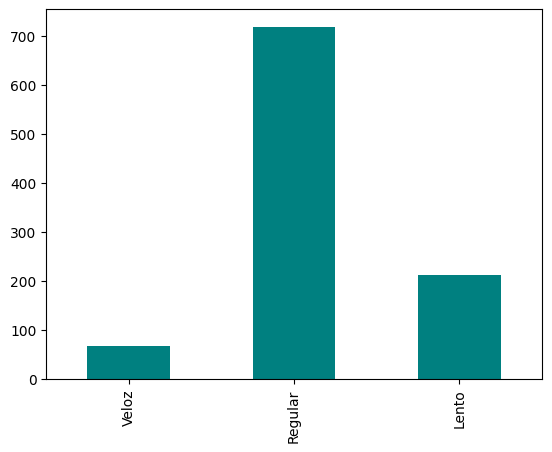

In [14]:
dfcantCorredoresVelocidad.plot.bar(color='teal',legend=False)

Vemos que la **mayoría de corredores** tuvieron una **velocidad Regular**.

### Cantidad de corroderes de cada sitio ###

Vamos a ver ahora la cantidad de corredores hay de cada lugar. No todos los lugares que indica Home son paises, sino la localidad u hogar del corredor.  
Tomando el **Home** del dataFrame podemos saber la cantidad de veces que se repite el hogar. Esto nos permite saber la cantidad de corredores de cada sitio.

In [15]:
"""
Utilizaremos la funcion serieFromColumn del modulo dataFrameFunctions
Devuelve una serie de pandas dandole un dataFrame y el string de su columna
"""

dff.serieFromColumn(dfScrappedCorredores,'Home').head(15)

NY     284
GBR     87
FRA     71
NJ      61
ITA     52
CA      40
NED     39
GER     28
MA      26
CT      20
CAN     19
TX      16
FL      16
MEX     15
IL      12
Name: Home, dtype: int64

Ademas, sabiendo esto, podemos acceder a la cantidad de sitios que participaron en la competición. Esto lo hacemos usando el atributo **size**.

In [16]:
dff.serieFromColumn(dfScrappedCorredores,'Home').size

72

Podemos ver que **participaron 72 sitios**, siendo el **sitio con más participantes Nueva York**.  
Vemos esto es un grafico de barras.

<AxesSubplot: xlabel='Paises', ylabel='Corredores por pais'>

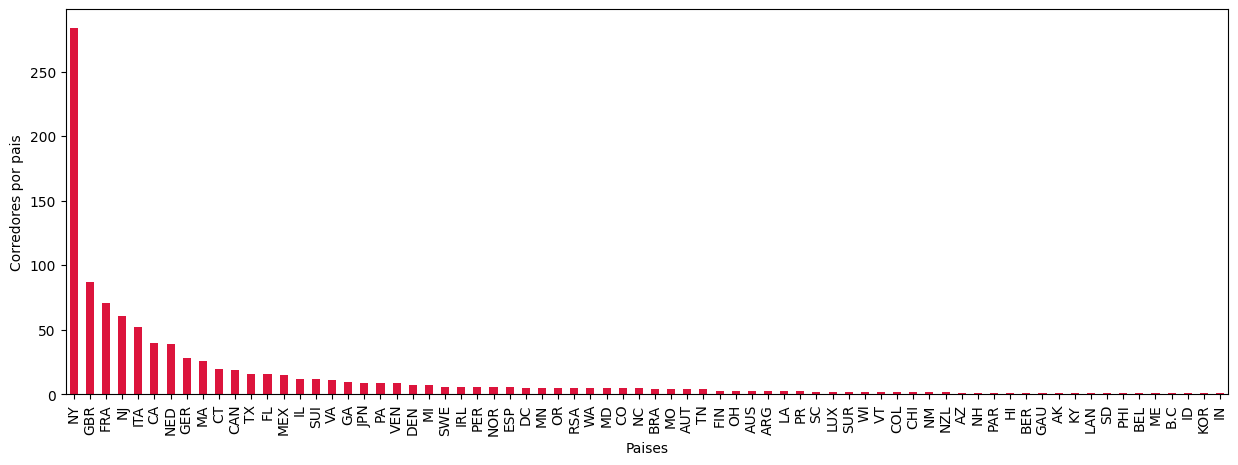

In [17]:
dff.serieFromColumn(dfScrappedCorredores,'Home').plot.bar(
    color='crimson',
    legend=False, 
    figsize=(15,5),
    xlabel='Paises', 
    ylabel='Corredores por pais')

### Corredores clasificados por edad ###

Hagamos un analisis de los corredores tomando en cuenta la edad.

In [18]:
dff.serieFromColumn(dfScrappedCorredores,'Age').size

56

A partir de esto podemos ver que la cantidad de edades de los competidores es de **56 años diferentes**.  


<AxesSubplot: xlabel='Corredores por edad', ylabel='Cantidad de corredores'>

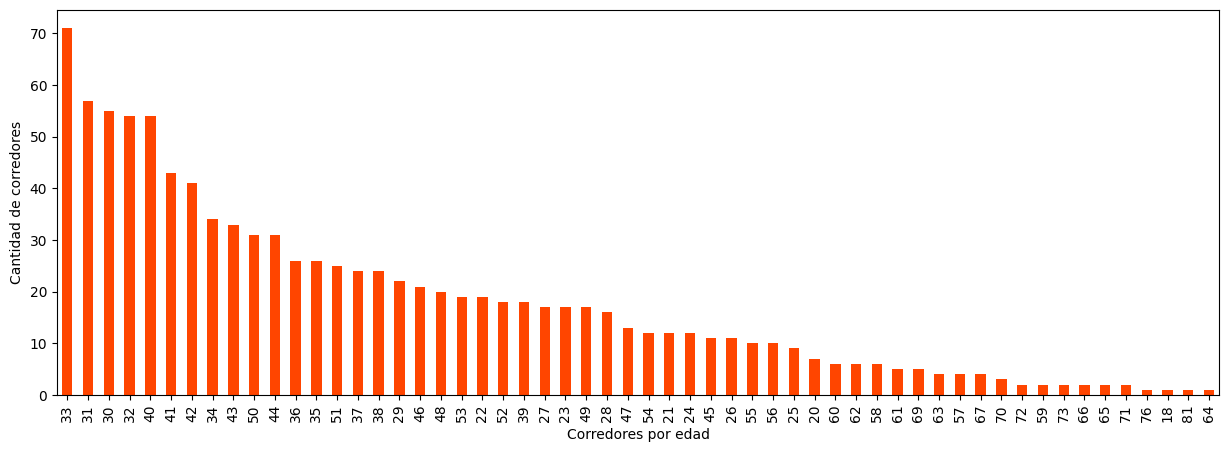

In [19]:
dff.serieFromColumn(dfScrappedCorredores,'Age').plot.bar(
        color='orangered',
        legend=False, 
        figsize=(15,5),
        xlabel='Corredores por edad', 
        ylabel='Cantidad de corredores')

En el grafico de arriba podemos observar que la **mayor cantidad de corroderes son de 33 años**... Pero el grafico muestra de mayor a menos segun la cantidad de corredores.    
Otra forma de verlo es si ordenamos la **edad de los corredores**.

<AxesSubplot: xlabel='Corredores por edad', ylabel='Cantidad de corredores'>

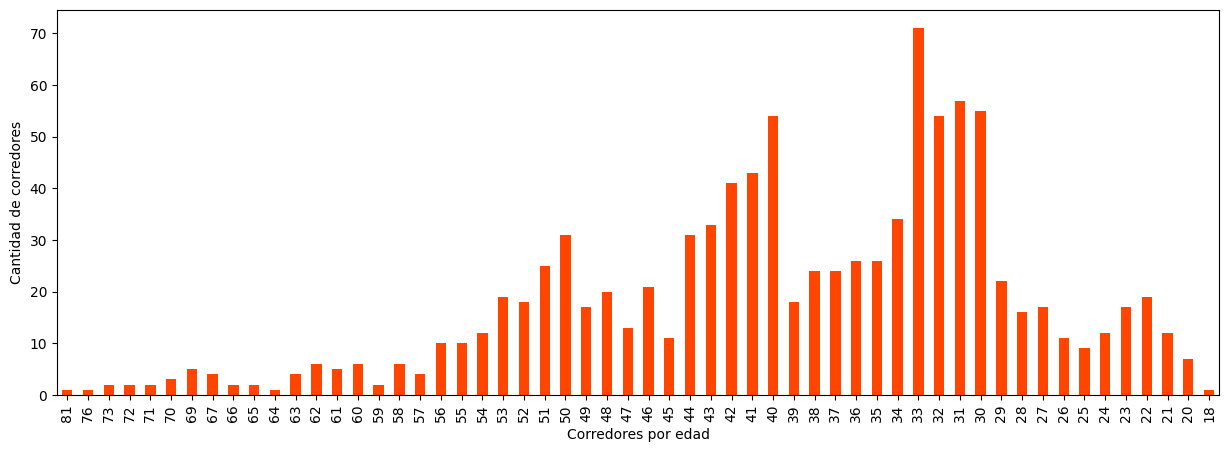

In [20]:
"""
Tambien usamos el metodo 'sort_index()' que ordena la Serie de forma decendente
"""
dff.serieFromColumn(dfScrappedCorredores,'Age').sort_index(ascending=False).plot.bar(
    color='orangered',
    legend=False, 
    figsize=(15,5),
    xlabel='Corredores por edad', 
    ylabel='Cantidad de corredores')

Se evidencia que la mayoria de los corredores tienen una edad que ronda alrededor de los **30 a 33 años**, y tambien otro grupo mas chico entre los **40 y 42 años**. A partir de eso algunos de los grupos de corredores no son tan amplias.

### Clasificacion de corredores segun su genero ###

Una cosa que podriamos ver por ejemplo es la cantidad de participantes hombres y mujeres. Vamos a utilizar el mismo metodo que el del punto anterior.

In [21]:
dff.serieFromColumn(dfScrappedCorredores,'Gender')

Male      707
Female    292
Name: Gender, dtype: int64

Podemos observar que en la competición hay **707 Hombres** y **292 Mujeres**

<AxesSubplot: xlabel='Genero de los corredores', ylabel='Cantidad de corredores'>

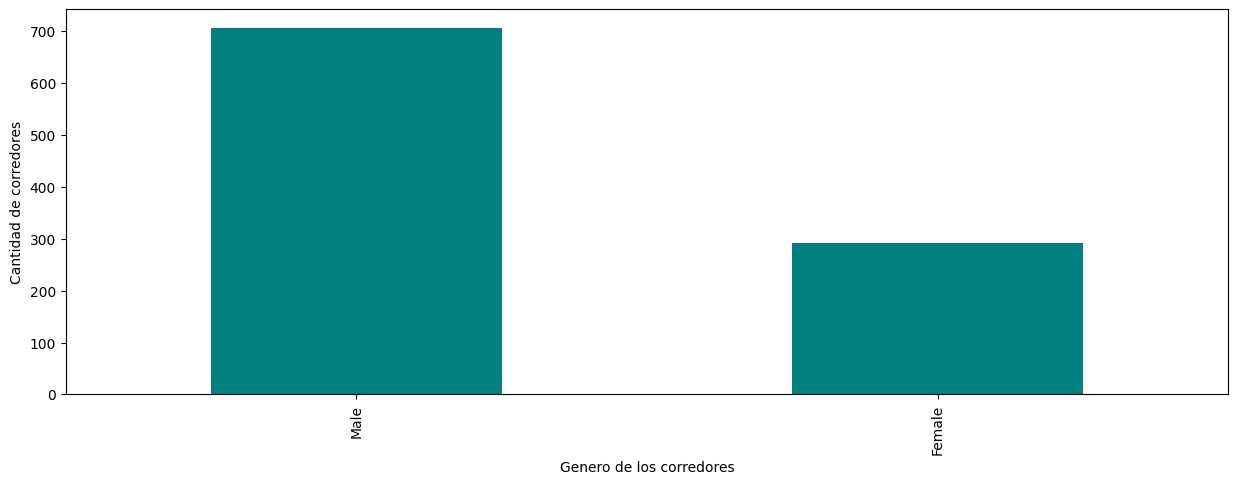

In [22]:
dff.serieFromColumn(dfScrappedCorredores,'Gender').plot.bar(
    color='teal',
    legend=False, 
    figsize=(15,5),
    xlabel='Genero de los corredores', 
    ylabel='Cantidad de corredores')

Hay una **mayoria de hombres** en este evento deportivo.

### Corredores más rapidos de cada pais ###

Pudimos ver antes que Nueva York era el pais con mayor cantidad de corredores en el evento, pero **¿sera el lugar con los corredores mas rapidos?**  
En este caso tomamos la columna del tiempo y buscamos el tiempo mas chico, que sería por ende el corredor mas rapido.  
Esto lo hacemos a travez del metodo `min()`

In [23]:
dfScrappedCorredores['Time'].min()

147.3333333

El tiempo mas corto fue de **147.33**.  
A travez de este dato buscaremos en el dataFrame quien es corredor mas rapido y de que sitio es.
Estp lo haremos a travez del atributo `loc`, que nos dará la fila que estamos buscando del dataFrame.

In [24]:
dfScrappedCorredores.loc[dfScrappedCorredores['Time'] == dfScrappedCorredores['Time'].min()]

,Place,Gender,Age,Home,Time,Velocity
764,54,Male,37,AK,147.333333,Veloz


Este sería el corredor mas rapido del evento que nos figura en nuestros datos. Es un corredor de origen **AK -> Alaska**, con una edad de **37 años**

<AxesSubplot: xlabel='Paises', ylabel='Tiempo de los corredores'>

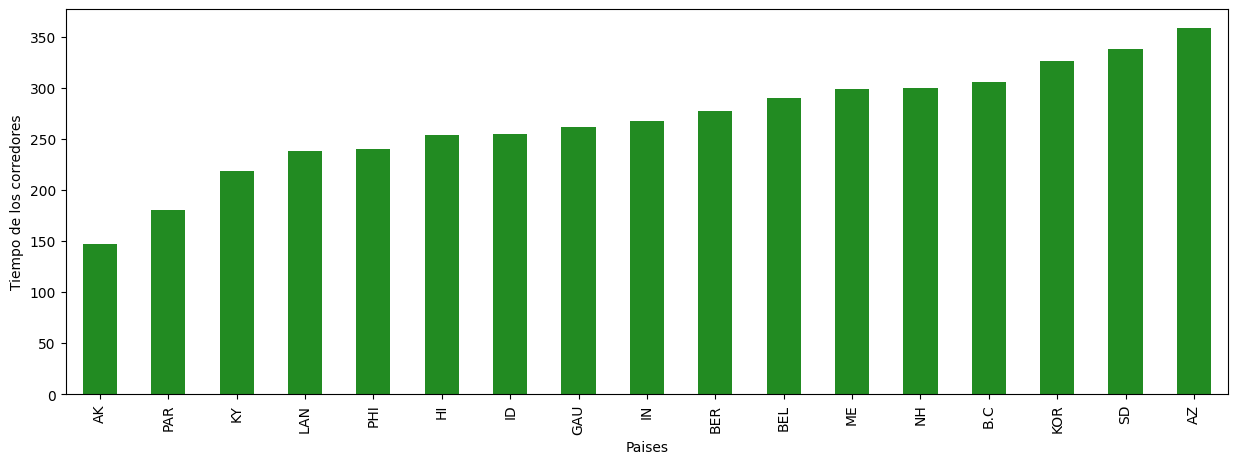

In [25]:
"""
En este caso hacemos un 'sort_values' tomando como referencia la columna de tiempo.
Copiamos el nuevo dataFrame y quitamos los duplicados de los Hogares de los corredores, quedando
unicamente los mas rapidos.
Esto ultimo lo hacemos con el metodo drop_duplicates()
"""

dfaux = dfScrappedCorredores.sort_values(by=['Time']).copy()
dfaux.drop_duplicates(subset=["Home"], keep=False).plot.bar(
    x='Home',
    y='Time',
    color='forestgreen',
    legend=False, 
    figsize=(15,5),
    xlabel='Paises', 
    ylabel='Tiempo de los corredores')

En este caso podemos observar que estos fueron los sitios con mejores tiempos en la carrera.  
El **sitio con el mejor tiempo fue Alaska**, con un tiempo **menor de 150**

### Relación entre la Posicion y el Tiempo ###

En este caso podemos hacer un grafico de **scatter** en el que relacionamos la posicion y el tiempo de los corredores.

<AxesSubplot: xlabel='Time', ylabel='Place'>

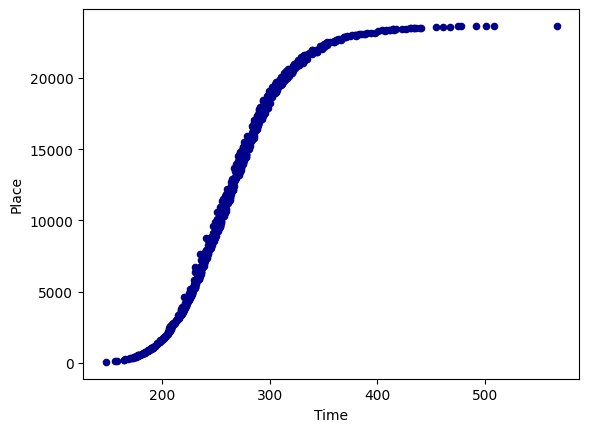

In [26]:
dfScrappedCorredores.plot.scatter(
    x='Time',
    y='Place',
    c='DarkBlue')

Lo que nos indica este grafico es que **los corredores con menor tiempo** en la carrera son los que **tienen una posicion menor**.  
Este tipo de dato tiene sentido ya que existe esa relación entre la posicion que van a tener y el tiempo que tienen en la carrera.  
Mientras **mayor el tiempo** que esten en la carrera, **mayor la posición** que tendran. 

### Relación entre el tiempo y la edad ###

Vemos en el grafico de abajo la relacion entre la columna **Time** y la columna **Age** de los corredores.  
Es observable que hay una gran cantidad de corredores que tuvieron un tiempo entre **200 y 350** y tienen una edad entre **20 y 60** años.  
Hay una mayor concentración de corredores en ese que cumplen ese rango.

<AxesSubplot: xlabel='Time', ylabel='Age'>

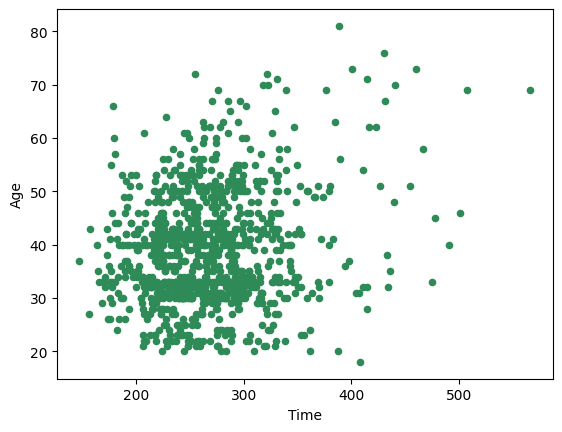

In [27]:
dfScrappedCorredores.plot.scatter(
    x='Time',
    y='Age',
    c='seagreen')

### Relación entre el tiempo y la edad por genero ###
Ahora, podriamos ver el grafico anterior, pero diferenciando el genero de cada competidor.

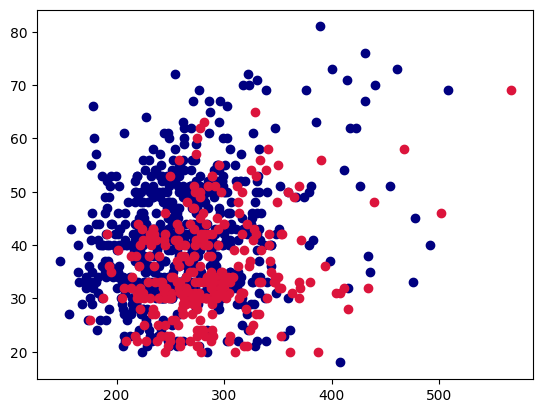

In [28]:
dfCorredoresHombres = dfScrappedCorredores[dfScrappedCorredores['Gender']=='Male'].copy()
dfCorredoresMujeres = dfScrappedCorredores[dfScrappedCorredores['Gender']=='Female'].copy()
plt.scatter(x=dfCorredoresHombres['Time'].to_numpy(),
    y=dfCorredoresHombres['Age'].to_numpy(),
    c='navy')
plt.scatter(x=dfCorredoresMujeres['Time'].to_numpy(),
    y=dfCorredoresMujeres['Age'].to_numpy(),
    c='crimson')
plt.show()

Viendo el grafico de scatter de arriba podemos corroborar que **la mayoria de corrodedores con un tiempo menor a 200 son hombres**.

### Relación entre el sitio y la edad ###

En esta situación se esperaba que haya una relación entre el sitio de los corredores y su edad. Pero vemos que no existe mucha relación. 
Existe una disperción bastante amplia. Gracias a esto podemos afirmar la poca relación que hay de la edad y el sitio de donde vienen en este evento.

<AxesSubplot: xlabel='Place', ylabel='Age'>

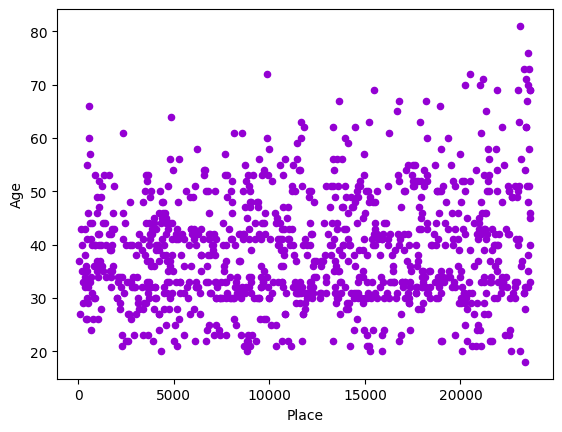

In [29]:
dfScrappedCorredores.plot.scatter(
    x='Place',
    y='Age',
    c='darkviolet')

### Relación entre el tiempo, la edad y la posición ###

Para este analisis vamos a ver la relación entre estas 3 variables, el tiempo, la edad y la posición.  
Esto es mas que nada una observación tomando como referencia los graficos anteriores.  
Con este grafico de scatter en 3D podemos ver incluso una visualizacion de los dos graficos superpuestos.  
Ademas de poder identificar cuales fueron los mejores corredores del evento tomando estas tres variables.  

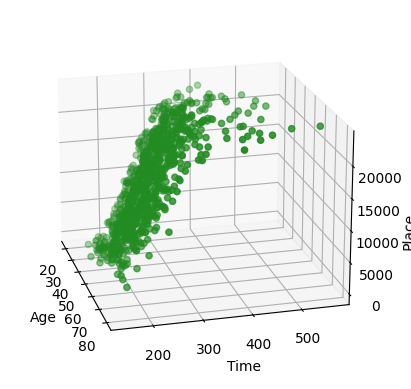

In [30]:
"""
Vamos a usar una funcion del moodulo 'module' que se llama plotScatter3D
Devuelve un grafico de scatter en 3D
"""

dff.plotScatter3D(dfaux,'Age','Time','Place',c='forestgreen',elev=20,azim=-15)

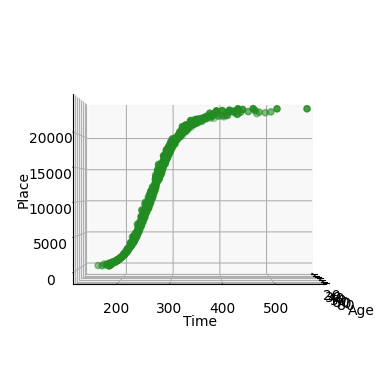

'\nRelación entre la Posicion y el Tiempo\n'

In [31]:

dff.plotScatter3D(dfaux,'Age','Time','Place',c='forestgreen',elev=0,azim=-0)

"""
Relación entre la Posicion y el Tiempo
"""

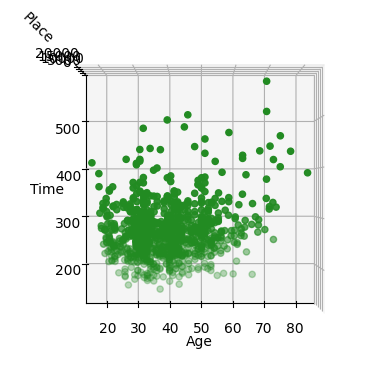

'\nRelación entre la Edad y el Tiempo\n'

In [32]:

dff.plotScatter3D(dfaux,'Age','Time','Place',c='forestgreen',elev=90,azim=-90)

"""
Relación entre la Edad y el Tiempo
"""

Tomando estos 3 graficos podemos deducir que los **corredores mas veloces** tuvieron:  
-   Un **tiempo menor a 200**  
-   Las edades de ellos es entre **20 y 70 años**  
-   Tuvieron **posiciones cercanos a 0**

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Machine Learning - Regresión ##

En este caso lo que vamos a buscar es desarrollar un sistema predictivo con Machine Learning usando **sklearn**. Para este caso, usaremos el metodo de **regresión**.  

Para esto, necesitamos tomar **variables independientes** (datos visibles, que vemos que no dependen de otro valor) y **las variables dependientes** (aquellos que si dependen de las variables independientes, son los que trataremos de predecir).  
Uno de los datos que se planteo de tomar como variable dependiente es la **Velocidad**. Pero, el problema con tomar la velocidad como variable dependiente es la simpleza de la predictividad de esta.  
La velocidad está definida por el tiempo del corredor, no hay datos que predecir, es algo estricto definido por algo que mencionamos con anterioridad:  

- Si el corredor tuvo un **tiempo mayor o igual a 300**, es considerado **Lento**  
- Si el corredor tuvo un **tiempo mayor o igual a 200**, es considerado **Regular**  
- Si el corredor tuvo un **tiempo menor a 200**, es considerado **Veloz**  

Por lo tanto, **descartaremos la velocidad como variable independiente**.  
La realidad es que no se predice la **velocidad del corredor**, sino que **se obtiene de forma condicional**.

Otro valor que **no tendremos en cuenta** es el **genero**. El genero, aunque influya en cierta forma al tiempo del corredor, por lo visto en uno de los graficos anteriores, y que en consecuencia afecte su posicion, no se tomara en cuenta debido a:
-   La diferencia de cantidad de hombres y mujeres en la carrera.
-   La fuerte relación que hay entre la posición y los tiempos.

Entonces ¿Cúal sería la variable dependiente? Otra opcion es tomar a la posición como variable dependiente, pues, aunque represente posición*, pudimos ver con anterioridad que existe una relación muy fuerte entre el tiempo y la posición tras completar la carrera.  

La posición es relativo al tiempo que estuvo en la carrera un competidor, por lo que podemos tomarlo como una variable dependiente.  
Tomando esto como referencia tomaremos la **posición del competidor** como la **variable dependiente**.  

Debido a esto, tomaremos como **variable independiente** al **tiempo del competidor**.

**La posicion, segun la consigna del trabajo practico, puede implicar un orden en los competidores, por lo que deberiamos desestimarlo. de todas formas, en este caso, parece un dato que puede ser predecible y evaluable*

### Variables ###


Creamos una nuevo dataFrame que llamaremos **dfaux**.  
Será un dataFrame auxiliar al que iremos cargando y modoficiando a lo largo de esta parte.

In [33]:
dfaux = dfScrappedCorredores.copy()
dfaux.pop('Home')
dfaux

,Place,Gender,Age,Time,Velocity
0,3592,Male,52,217.483333,Regular
1,13853,Female,40,272.550000,Regular
2,12256,Male,31,265.283333,Regular
3,10457,Female,33,256.150000,Regular
4,9686,Male,33,252.250000,Regular
...,...,...,...,...,...
995,16261,Male,61,285.883333,Regular
996,1131,Male,37,191.916667,Veloz
997,16713,Female,53,289.016667,Regular
998,14241,Female,21,276.050000,Regular


#### Variable independiente ####
Extraemos la variable independiente con el atributo `iloc`, que nos dara la fila que estamos buscando.  
Este es el parametro de sliccing que vamos a usar para el **iloc** -> [:,3:-1]  
-   En la primer parte antes de la coma estamos tomando todos los elementos del dataFrame
-   En la segunda parte estamos tomando la columna de indice 3, y que cree una nueva columna luego de tomarla
-   Luego hacemos un reshape para acomodar el nparray

In [34]:
X=dfaux.iloc[:, 3:-1].values.reshape(-1,1)

#### Variable dependiente ####
Hacemos lo mismo que con la variable independiente, pero esta ves lo ubicamos en el **indice 0**

In [35]:

Y=dfaux.iloc[:,0].values.reshape(-1,1)

#### Escala ####
Ahora debemos de acomodar los valores que estan presentes en ambas variables.  
Ambas variables presentan valores que son muy dispares, por lo que necesitamos de modificarlos a una escala fija.  
Por eso, usaremos uno de las clases que nos aporta sklearn que se llama `StandarScaler()`, y apartir de ahí modificaremos los datos de las variables a valores mas chicos.  
Para esto, usaremos uno de los metodos que nos otorga el Scaler, este se llama `fit_transform()`.

In [36]:
sc = StandardScaler()
X = sc.fit_transform(X)
Y = sc.fit_transform(Y)

Ahora, usaremos estos nuevos datos, y los pasaremos en el **dfaux** que teniamos para poder verlos.

In [37]:
dfaux = pd.DataFrame({'X': X.flatten(), 'Y': Y.flatten()})
dfaux.head(10)

,X,Y
0,-0.953555,-1.224345
1,0.074962,0.272370
2,-0.060763,0.039425
3,-0.231352,-0.222985
4,-0.304195,-0.335447
5,-1.243371,-1.488068
6,0.280728,0.588459
7,-0.236333,-0.172224
8,-0.080063,0.031402
9,0.712493,1.061935


### Variables Train y Test ###

Ya tenemos las variables dependientes e independientes.  
Procedamos a crear las variables Train y Test de cada una para hacer el metodo predictivo.
Para esto, usaremos una de las funciones de **sklearn** que se llama `train_test_split()`.  
Esta funcion nos permite separa en 4 variables las variables que ya poseiamos, X e Y (independiente y dependiente respectivamente).  
En uno de los parametros que indica `test_size` colocamos **0.2**, o sea que tomaremos el **20%** de los datos de las variables y las separaremos en dos partes.  
Uno el **20%** ira a las **variables test** y el **80%** ira a las **variables train**.  
Se trabajará con el 80% de los datos de training para poder predecir los resultados del `Y_test`.

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=0)

Debajo podemos ver que estamos usando nuevamente el dataFrame **dfaux** y almacenando los datos de las **variables Train**

In [39]:
dfaux = pd.DataFrame({'X_train': X_train.flatten(), 'y_train': Y_train.flatten()})
dfaux.head(15)

,X_train,y_train
0,0.519179,0.876833
1,-0.485991,-0.574956
2,-0.263104,-0.318818
3,0.769149,1.108466
4,-0.214542,-0.155450
5,-0.780787,-1.002339
6,-0.173763,-0.110232
7,-0.387933,-0.432884
8,-0.922737,-1.201152
9,-0.436184,-0.501732


Ahora haremos lo mismo que el anterior pero caso pero con las **variables Test**

In [40]:
dfaux = pd.DataFrame({'X_test': X_test.flatten(), 'y_test': Y_test.flatten()})
dfaux.head(15)

,X_test,y_test
0,-0.430581,-0.544616
1,0.990168,1.269646
2,-0.546693,-0.638407
3,0.378163,0.713756
4,3.863106,1.697320
5,-0.851451,-1.132888
6,-0.895655,-1.191963
7,-1.811172,-1.699425
8,1.223016,1.409238
9,0.697862,1.107882


### Regresión Lineal Simple ###

Para el metodo de regresión trabajaremos con la regresión lineal simple.  
Para esto, usaremos la clase `LinearRegresion()` de sklearn.  
Esto nos devolverá un objeto que almacenaremos en **LinearModel**.  
Para poder "entrenar" este modelo, trabajará con con las variables Train que generamos previamente utilizando el metodo `fit()`.

In [41]:
linearModel = LinearRegression() 
linearModel.fit(X_train, Y_train)

LinearRegression()

#### Predict() y comparacion con el Test ####

Ahora que pudimos "Entrenar" al modelo que que generamos, vamos a seguir con la **preccion del Y_test**.  
Para hacer esto vamos a trabajar con el metodo `predict()` que nos dará una predicción de los datos de **Y_test** dandole por paramero **X_test**.  
El resultado de esta predicción la guardaremos en **y_pred**, que sería la **predicción de y**.

In [42]:
y_pred = linearModel.predict(X_test)

Debajo se puede ver en un dataFrame el **Y_test** y el **y_pred**

In [43]:
dfaux = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
dfaux.head(15)

,Actual,Predicted
0,-0.544616,-0.399886
1,1.269646,0.910737
2,-0.638407,-0.506999
3,0.713756,0.346170
4,1.697320,3.560989
5,-1.132888,-0.788134
6,-1.191963,-0.828912
7,-1.699425,-1.673466
8,1.409238,1.125537
9,1.107882,0.641089


Ahora, necesitariamos ver esto desplegado en un grafico para poder ver claramente la presición de nuestro modelo.  
En primer lugar tenemos un grafico de barras que muestra al **Y_test**(Actual) y al **y_pred**(Predicted) uno al lado del otro.

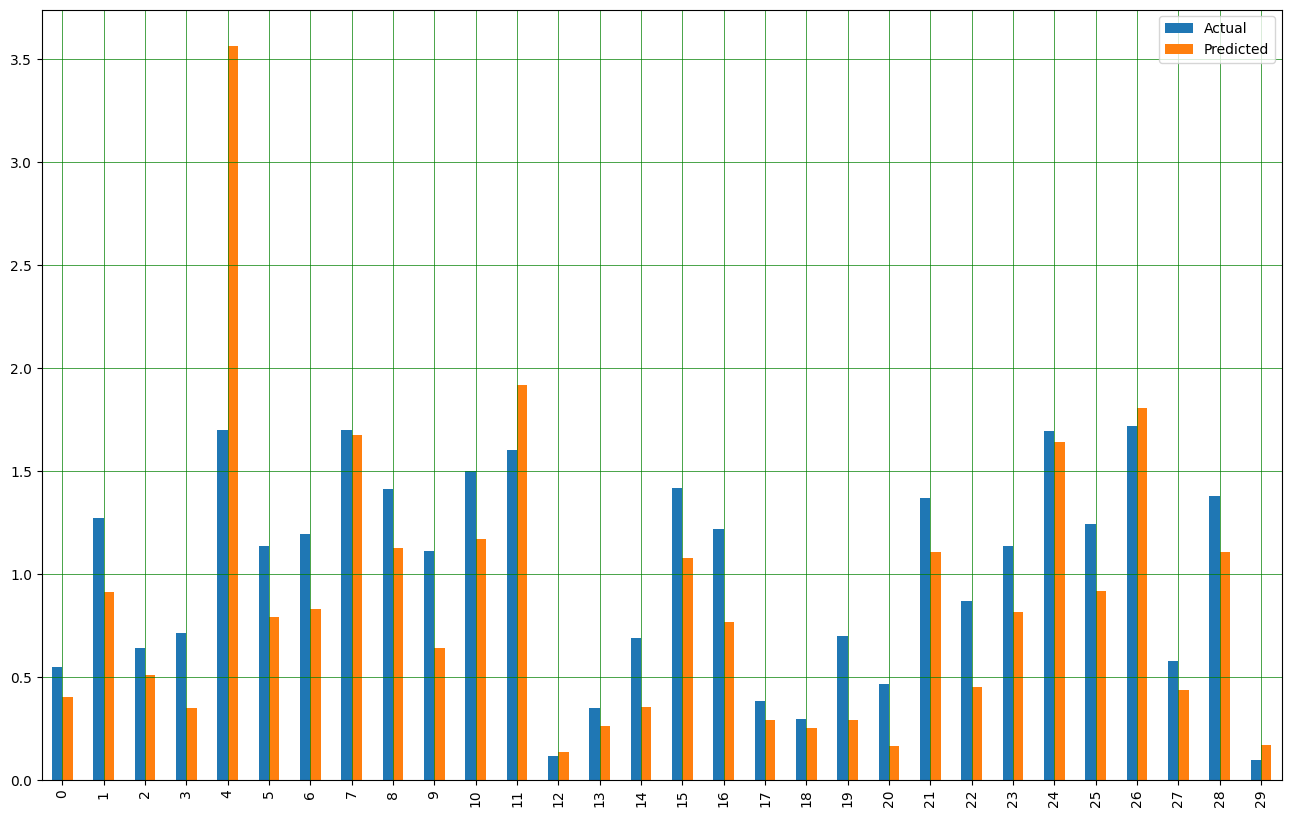

'\nGráfico de barras mostrando la comparación de valores reales y predecidos \n'

In [44]:
df1 = dfaux.head(30).abs()
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

'''
Gráfico de barras mostrando la comparación de valores reales y predecidos 
'''

Ahora, visto en un grafico lineal y de scatter, podemos observar la similitud entre la relacion del **X_test** con el **Y_test**, y el **X_test** con la predicción, **y_pred**.  
Vemos en algunos casos, por ejemplo en 4, 11 y 26 (parte inferior del grafico) son algun de los casos en los que el **modelo supera a los valores originales**, lo cual nos muestra una **desviación** evidente del modelo predictivo.

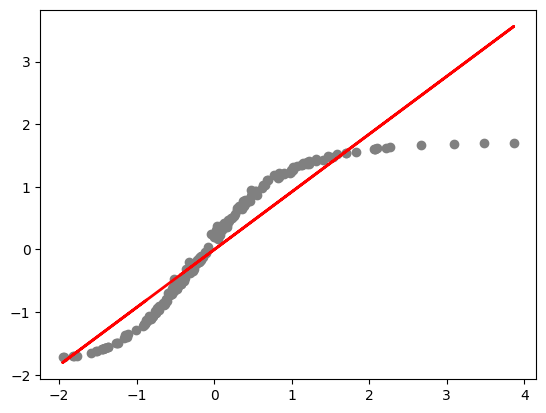

In [45]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Se ve que hay una aproximación cercana desde -2 hasta 2, pero a partir de ahí ya empieza a reducir la relación entre el original y el modelo, como ya nos indicaba el grafico anterior.

### Porcentaje de error y conclusiones ###

In [46]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(Y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(Y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Error Absoluto Medio: 0.2649735226471772
Error Cuadratico Medio: 0.11317518104796256
Raíz del error cuadrático medio: 0.3364151914643014


Vemos que el la raiz de error es bastante baja, lo cual nos indica que nuestro modelo predictivo es bastante acertado.  
De todas formas, este modelo utiliza una regresión **lineal**, por lo que podria modificarse un poco para poder obtener un modelo aun mas preciso.
Para hacer esto, usaremos otro modelo de regresión llamado **Regresión Polinomica** 

## Regresion Polinomica ##

### Test y Train de regresion polinomica ###

El objetivo de hacer la regresion polinomica es obtener un modelo que pueda generar predicciones mas exactas que el anterior.  
Para esto, usaremos una clase nueva **sklean** llamada `PolynomialFeatures()`, y colocamos el grado del polinomio que vamos a usar, en este caso es un polinomio de **grado 2**.  
**poly** será el objecto que nos servirá como modelo para esta regresión.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=0)
poly = PolynomialFeatures(degree=2)

### fit_transform() de regresion polinomica ###

Ahora necesitariamos hacer un `fit_transform()` como en la regresion anterior.  
En este caso, ya hicimos `fit_transform()` a las variables dependientes e independientes, pero la regresión polinomica funciona de otra forma.  
Necesitamos hacer un `fit_transform()` pero especificamente con el objeto **poly** que creamos previamente.

In [48]:
X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.fit_transform(X_test)

### Aplicando un modelo de regresión polinomica ###

Para hacer una **regresión polinomica**, hay que interpretarlo como una **regresion lineal**.  
Veamoslo de esta forma:  
Una ecuación de regresion polinomica está compuesta de la siguiente forma:

![Alt text](../../../../../C:/Proyectos/Python/git/TP_Matematica_III/assets/poly_regr%20.jpeg)

-   **y = B0 + B1 * x1 + B2 * x1^2**  

Esta sería nuestra ecuación en para la **regresión polinomica** de **grado 2**.
Para poder implementar un modelo de regresion polinomica, necesitamos transformar esta ecuacion polinomica en una de regresion lineal.
Para hacer esto, lo que podemos hacer es transformar **x1^2** en una variable, por ejemplo **z**.  
Esto nos dejaría con la siguiente ecuación:  

-   **z = x1^2**
-   **y = B0 + B1 * x1 + B2 * z**  

Ahora sabiendo esto, podemos proseguir. Para esto, necesitamos obtener un modelo de regresion linearl. para ello, usaremos el paquete llamado `lineal_model`, del cual tomaremos `LinearRegresion()`.  
Ademas, ya pudimos ponerlo a entrenar con **X_train_poly** y **Y_train**

In [49]:
polyModel = linear_model.LinearRegression()
polyModel = polyModel.fit(X_train_poly, Y_train)

### coeficiente e intereseccion del modelo ###

Ahora, para poder aplicarlos en el polinomio de regresión polinomica, necesitamos el valor de la **intersección** del modelo, y el valor sus **coeficientes**. para ello, utilizaremos los atributos `coef_` y `intercept_`.

In [50]:
coefficient = polyModel.coef_.flatten()
intercept = polyModel.intercept_.flatten()

El **coeficiente** sería el coeficiente, valga la redundancia, de cada elemento del polomio. o sea, que nos daría el coeficiente de B0, B1 y B2.

In [51]:
coefficient

array([ 0.        ,  1.11004537, -0.16416538])

La **intercepcion** sería el valor de interseccion del modelo, a lo cual nos sirve para utilizarlo en B0.

In [52]:
intercept

array([0.16291004])

Si vemos como realmente quedaría el polinomio con los datos obtenidos, obtendriamos algo como esto:
-   **y = intercept + coefficient[1] . X + coefficient[2] . X^2**

### Predicción con predict y la funcion de regresion polinomica ###

Seguiremos de la misma forma anterior. Crearemos un **y_pred** que tendra la predicción del **y_test**.

In [53]:
y_pred = polyModel.predict(X_test_poly)

Y haremos la comparación con el dataFrame.

In [54]:
dfaux = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
dfaux.head(15)

,Actual,Predicted
0,-0.544616,-0.345490
1,1.269646,1.101088
2,-0.638407,-0.493009
3,0.713756,0.559211
4,1.697320,2.001197
5,-1.132888,-0.901254
6,-1.191963,-0.963000
7,-1.699425,-2.386092
8,1.409238,1.274960
9,1.107882,0.857618


Y con su respectivo grafico.

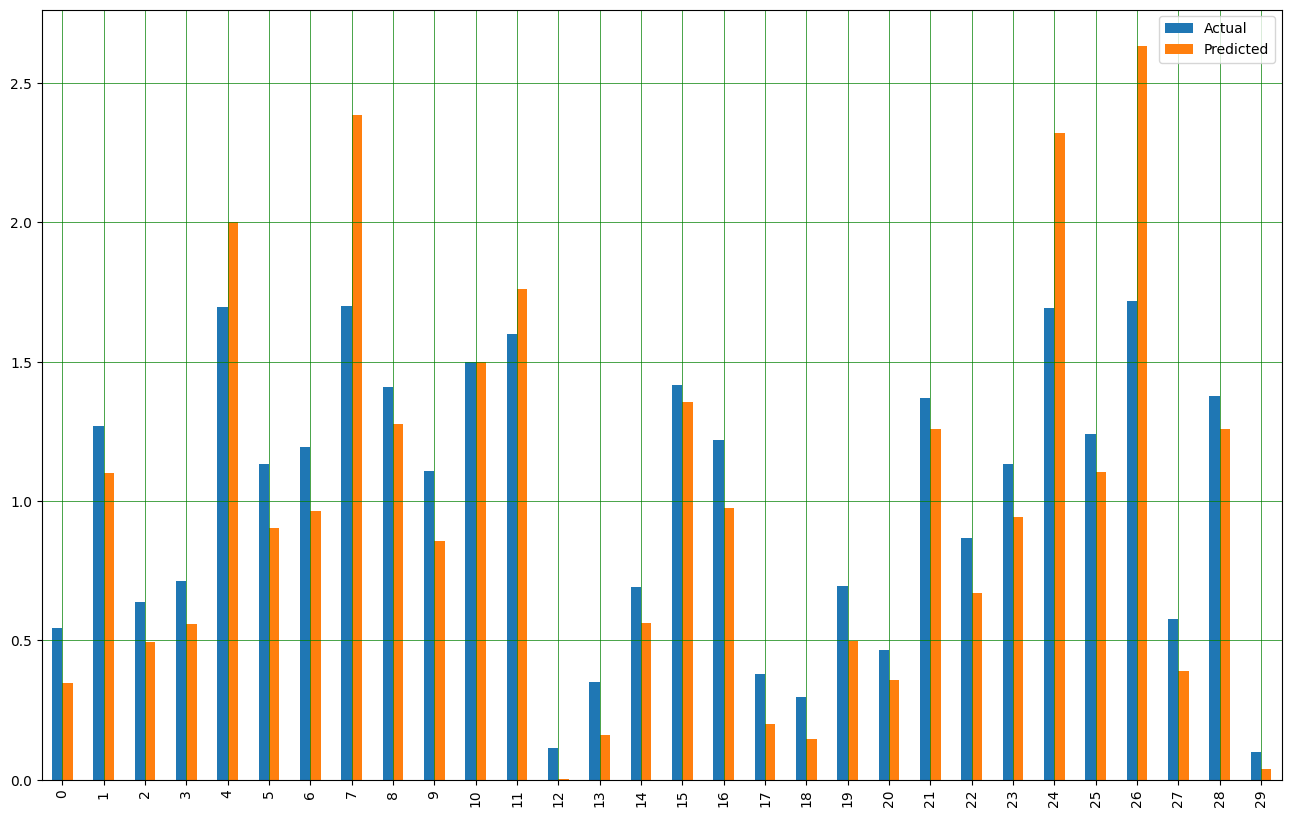

In [55]:
df1 = dfaux.head(30).abs()
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Veamos ahora su representación grafica de forma polinomica y de scatter.

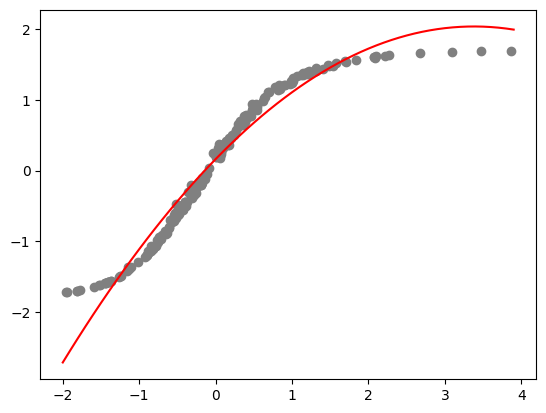

In [56]:
x_axis = np.arange(-2,4,0.1)
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis**2

plt.scatter(X_test, Y_test,  color='gray')
plt.plot(x_axis,response,color='red')
plt.show()

Vemos que la función polinomica es mucho mas precisa que el anterior, que era lineal.  
Esto nos pertmite tener un acercamiento mas grande a los valores del **Y_test**.  
Podremos ver la presición de este modelo y compararlo con el anterior en el siguiente tema.

### Porcentaje de error ###

In [57]:
"""
Error anterior
---------------
Error Absoluto Medio: 0.2649735226471772
Error Cuadratico Medio: 0.11317518104796256
Raíz del error cuadrático medio: 0.3364151914643014
"""
print('Error Absoluto Medio:',metrics.mean_absolute_error(Y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(Y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Error Absoluto Medio: 0.16438878342305827
Error Cuadratico Medio: 0.042271070736417594
Raíz del error cuadrático medio: 0.20559929653677708


Como podemos ver, el grado de error que nos figura en nuestro nuevo sistema es mejor que el anterior. Hagamos la comparación:  

    -   error absoluto medio:
        -   lineal: 0.2649735226471772
        -   polinomica: 0.16438878342305827
    
    -   error cuadratico medio:
        -   lineal: 0.11317518104796256
        -   polinomica: 0.042271070736417594
    
    -   raiz del error cuadratico medio:
        -   lineal: 0.3364151914643014
        -   polinomica: 0.20559929653677708



Podemos observar que el **grado de error del modelo polinomico es menor que el del modelo linea**, demostrando así que el nuevo modelo es superior al anterior para este caso.

### Conclusiones Finales ###

El objetivo principal del analisis de estos datos es poder llegar a ciertas conclusiones.  
Datos los analisis que hicimos previamente, y a los que se trabajo en seccion de regresión podemos afirmar la fuerte relación entre el tiempo de los corredores y la posición asiganada al completar la carrera.  
-   Podemos decir que mientras menor sea el tiempo recorrido, menor va a ser su posición, y por ende va a ser categorizado por uno veloz.  
Ademas, vale remarcar un dato que no fue mencionado antes, que tiene que ver con los mas lentos.  
Los corredores **mas lentos** tienen una **edad entre 70 y 80 años aproximadamentte**, ademas de poseer **tiempos mayores a 400**, y **posiciones mayores a 20000**.  
-   Pudimos concluir que, aunque el tiempo influya de una manera agresiva a la posición, no podemos negar que **la edad tambien influye tambien en la posición del corredor**, ya que mientras esté en un rango coherente de edad, los resultados que puede obtener de posición pueden ser muy bajos.  
-   Aunque la edad influya a la hora de decidir la posición, **no quiere decir que mientras mas joven sea menos tiempo tardará**. Pues incluso en casos donde, por ejemplo, los corredores menores a 20 años poseen tiempos mas altos incluso siendo jovenes. Gracias a esto, podemos decir que **no es una cuestion de que tan joven es, sino si está en su mejor edad**, ya que el rango estimado de edad para tener un tiempo menor es de entre 20 a 60 años.  
-   Podemos afirmar que **la Velocidad no es un dato analisable mas allá de la cantidad**, ya que no estamos hablando de un dato medible, sino de un dato condicionado por el tiempo que estuvo en la carrera. Por eso, en los analisis previos, solamente nos limitamos a hacer graficos con respecto a la cantidad y no a datos condicionados.
-   Hemos analisado como el **genero podria servirnos para analisar la relación entre el tiempo y la edad**, como vimos en los graficos anteriores. Sabiendo esto, **podriamos usarlo como metodo predictivo**, aunque **podría estar sesgado por la cantidad de hombre que participaron** en el evento (mas del doble que el de las mujeres). Para el caso anterior lo que se podria usar un `StandarScaler()`. De todas formas, aunque sea un dato que podria ser util a tener en cuenta, **se decidió tomar el tiempo y la posicion como analisis de regresion lineal simple en lugar del genero** debido a su fuerte relación.